             timestamp   sensor1   sensor2   sensor3   sensor4  temperature  \
0  2025-01-01 00:00:00  0.496714 -0.138264  0.647689  1.523030    49.101079   
1  2025-01-01 01:00:00 -0.234153 -0.234137  1.579213  0.767435    25.124182   
2  2025-01-01 02:00:00 -0.469474  0.542560 -0.463418 -0.465730    78.347683   
3  2025-01-01 03:00:00  0.241962 -1.913280 -1.724918 -0.562288    51.080626   
4  2025-01-01 04:00:00 -1.012831  0.314247 -0.908024 -1.412304    56.851175   

   pressure          rpm  vibration_level  failure  
0  1.675437  1123.172425         7.327234        1  
1  2.842691   574.428418         6.858763        1  
2  2.228351  1003.691761         8.332713        1  
3  1.140637   682.625130         2.499590        0  
4  2.292581  1073.975175         6.095285        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time

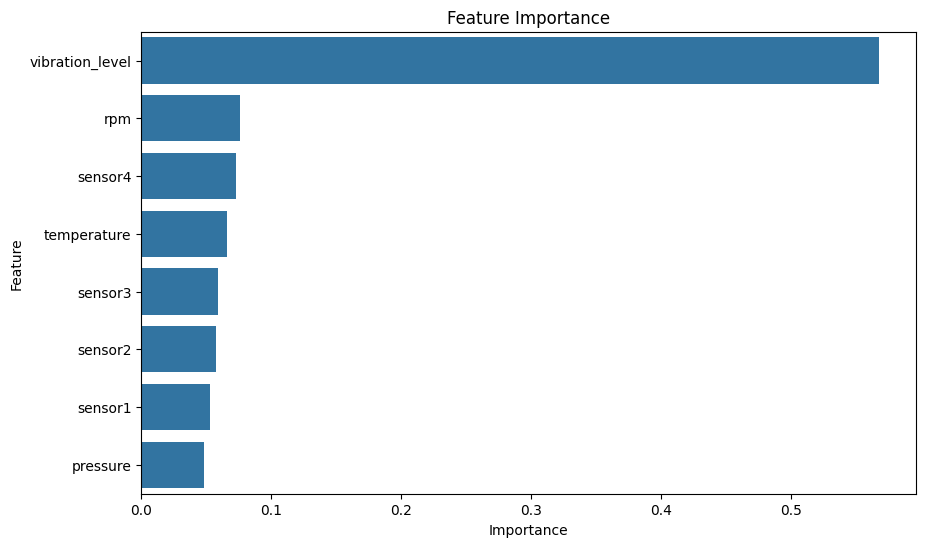

In [1]:
# Predictive Maintenance of Rotating Machinery

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load vibration sensor data
data = pd.read_csv('vibration_data.csv')  # Replace with your dataset file path

# Display basic information about the dataset
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Handle missing values (if necessary)
#data.fillna(data.mean(), inplace=True)

# Define features (X) and target (y)
X = data.drop(['failure', 'timestamp'], axis=1)  # Replace 'failure' with the name of your target column
                                     # Remove 'timestamp' or irrelevant columns if necessary
y = data['failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Save the model
import joblib
joblib.dump(model, 'predictive_maintenance_model.pkl')

# Load the model (example of reuse)
loaded_model = joblib.load('predictive_maintenance_model.pkl')
new_predictions = loaded_model.predict(X_test)  # Example usage
